Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.applications.vgg16 import VGG16
import shutil
import os

Loading files

In [2]:
#path = [('test', 'Test.csv'), ('train', 'Train.csv'), ()]

class Loader():
    def __init__(self, paths ):
        self.paths = paths
        self.train = None
        self.test = None 
        self.submission = None
    def files(self):
        for path in self.paths:
            if path[0] == 'test':
                self.test = pd.read_csv(path[1])
            elif path[0] == 'train':
                self.train = pd.read_csv(path[1])
            else:
                self.submission = pd.read_csv(path[1])
        print('<------------------------------Files read and Passed to Memory-------------------------------->')
    
        

In [3]:
path = [('test', 'Test.csv'), ('train', 'Train.csv'), ('submission', 'SampleSubmission.csv')]
loader = Loader(paths=path)

In [4]:
reader = loader.files()

<------------------------------Files read and Passed to Memory-------------------------------->


In [5]:
test = loader.test
train = loader.train
submission = loader.submission

In [6]:
submission

ID  LABEL
0   GTWSHFYQ      0
1   QTFSSMGD      0
2   TBLBHSYT      0
3   ZKETEOFG      0
4   GKTPBGZP      0
..       ...    ...
77  UHRZNUCQ      0
78  RQZCAYRX      0
79  KGOETYSK      0
80  ZPPGWFUO      0
81  KIRUHEIC      0

[82 rows x 2 columns]

In [7]:
test

filename        ID
0   test/GTWSHFYQ.png  GTWSHFYQ
1   test/QTFSSMGD.png  QTFSSMGD
2   test/TBLBHSYT.png  TBLBHSYT
3   test/ZKETEOFG.png  ZKETEOFG
4   test/GKTPBGZP.png  GKTPBGZP
..                ...       ...
77  test/UHRZNUCQ.png  UHRZNUCQ
78  test/RQZCAYRX.png  RQZCAYRX
79  test/KGOETYSK.png  KGOETYSK
80  test/ZPPGWFUO.png  ZPPGWFUO
81  test/KIRUHEIC.png  KIRUHEIC

[82 rows x 2 columns]

In [8]:
a = 'train/haha'

In [9]:
a.split('train/')[1]

'haha'

 LABEL=1 means the x-ray is TB-positive. Please keep your values as probabilities.

In [10]:
class FileClassifier():
    def __init__(self):
        self.status = 0;
        self.classes = ['TB_POSITIVE', 'TB_NEGATIVE']
        
    def sort_files(self):
        train_df, test_df = train, test
        
        test_raw_dir = 'test_small'
        
        train_raw_dir = 'train_small'
        
        ##-------Creating Directories-----------##
        
        for dir_name in self.classes:
            dir_path_train = os.path.join('train', dir_name)
            if not os.path.exists(dir_path_train):
                os.makedirs(dir_path_train)
            else: 
                self.status = 1
                print('<------Directories sorted --------------->')
        
        if self.status == 0:
            for index, train_filename in enumerate(train_df['filename']):
                if train_df['LABEL'][index] == 1:
                    shutil.move(train_raw_dir+'/'+train_filename.split('train/')[1], 'train/'+self.classes[0])
                else:
                    shutil.move(train_raw_dir+'/'+train_filename.split('train/')[1], 'train/'+self.classes[1])

            test_path = os.path.join('test')        
            os.mkdir(test_path)  
            for test_files in test_df['filename']:
                shutil.move(test_raw_dir+'/'+test_files.split('test/')[1], 'test')
            print('done')
        
        else: print('<-----------------------All jobs taken care of---------------------------->')

In [11]:
FileClassifier().sort_files()

<------Directories sorted --------------->
<------Directories sorted --------------->
<-----------------------All jobs taken care of---------------------------->


In [12]:
train_dir = '/home/sebago/Desktop/DevHub/MachineLearning/TB_AI/train'
val_dir = '/home/sebago/Desktop/DevHub/MachineLearning/TB_AI/validation'
test_dir = '/home/sebago/Desktop/DevHub/MachineLearning/TB_AI/test'

In [13]:
test_datagen = ImageDataGenerator(rescale=1./255)

train_datagen = ImageDataGenerator(rescale=1./255, 
                                   rotation_range=40,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True
                                  )


train_generator = train_datagen.flow_from_directory(
   train_dir , target_size = (256,256), batch_size = 32, class_mode='binary', seed=200
)


validation_generator = test_datagen.flow_from_directory(
    train_dir, target_size=(256,256), batch_size = 32, class_mode='binary'
)

test_generator = test_datagen.flow_from_directory(
    test_dir, target_size=(256,256), batch_size = 32, class_mode=None
)

Found 718 images belonging to 2 classes.
Found 718 images belonging to 2 classes.
Found 0 images belonging to 0 classes.


In [14]:
x, y = train_generator.next()

In [15]:
from tensorflow.keras.preprocessing import image

In [16]:
from tensorflow.keras.models import load_model

In [17]:
train_generator.class_indices

{'TB_NEGATIVE': 0, 'TB_POSITIVE': 1}

0.0
(256, 256, 3)


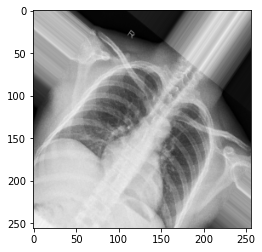

0.0
(256, 256, 3)


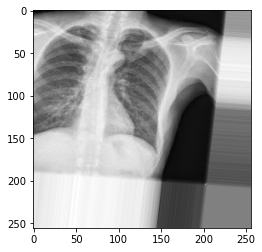

In [18]:
for i in range(1,3):
    image = x[i]
    print(y[i])
    print(image.shape)
    plt.imshow(image)
    plt.show()

In [20]:
class Vision():
    def __init__(self, shape):
        self.shape = shape
    def learn_from_zero(self):
        model = keras.models.Sequential()

        model.add( keras.layers.Conv2D(3,(3,3) ,activation='relu', input_shape = self.shape ) )

        model.add( keras.layers.Conv2D(16,(3,3), activation=keras.activations.tanh ) )
        
        model.add( keras.layers.Conv2D(128,(3,3), activation='relu') )
        model.add( keras.layers.MaxPooling2D((2,2)) )

        model.add( keras.layers.Conv2D(128, (3,3), activation='relu') )
        model.add( keras.layers.MaxPooling2D((2,2)) )
        
        model.add( keras.layers.Conv2D(128,(3,3), activation=keras.activations.selu ) )

        model.add( keras.layers.Conv2D(64, (3,3), activation='relu') )
        model.add( keras.layers.MaxPooling2D((2,2)) )

        model.add( keras.layers.Conv2D(64, (3,3), activation='relu') )
        model.add( keras.layers.MaxPooling2D((2,2)) )

        model.add( keras.layers.Conv2D(32, (3,3), activation='relu') )
        model.add( keras.layers.MaxPooling2D((2,2)) )



        model.add(keras.layers.Flatten())

        model.add(keras.layers.Dropout(0.5) )

        model.add( keras.layers.Dense(512, activation='relu'))
        
        model.add(keras.layers.Dropout(0.5) )

        model.add(keras.layers.Dense(256, activation='relu'))
        
        model.add(keras.layers.Dense(128, activation='relu'))
        
        model.add(keras.layers.Dense(128, activation='relu'))
        
        model.add(keras.layers.Dense(128, activation='relu'))
        
        model.add(keras.layers.Dense(64, activation='relu'))
        
        model.add(keras.layers.Dense(32, activation='relu'))

        model.add( keras.layers.Dense(1, activation='sigmoid'))
        
        return model
    
    def transfer_learning(self, model_arch):
        
        conv_base = model_arch(weights='imagenet', include_top = False, input_shape = self.shape )
        
        model = keras.models.Sequential()
        
        model.add(conv_base)
        
        model.add(keras.layers.Flatten())

        model.add( keras.layers.Dense(256, activation='relu'))

        model.add(keras.layers.Dense(512, activation='relu'))

        model.add(keras.layers.Dense(256, activation='relu'))
        
        model.add(keras.layers.Dense(256, activation='relu'))

        model.add( keras.layers.Dense(1, activation='sigmoid'))
        
        return model
        
        

In [21]:
# ResNetVision = ResNet50(weights='imagenet', include_top=False, input_shape=(256,256,3))

In [22]:
open_computer_vision = Vision((256,256,3))

In [23]:
start_learning = open_computer_vision.learn_from_zero()

# transfer_learn = open_computer_vision.transfer_learning(ResNet50)

In [24]:
# transfer_learn.summary()

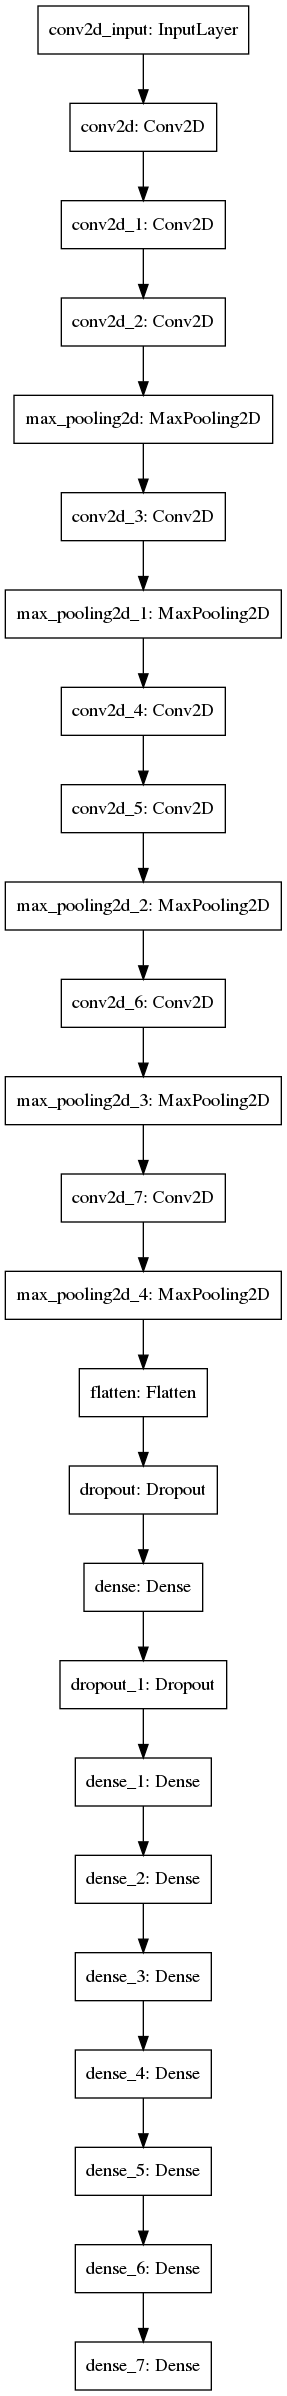

In [25]:
import pydot
#for visualizing the model
keras.utils.plot_model(start_learning)

In [26]:
start_learning.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 254, 254, 3)       84        
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 252, 252, 16)      448       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 250, 250, 128)     18560     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 125, 125, 128)     0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 123, 123, 128)     147584    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 61, 61, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 59, 59, 128)       1

In [27]:
start_learning.compile( loss='binary_crossentropy', optimizer=keras.optimizers.SGD(0.001), metrics=['accuracy'] )
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-model2.h5', save_best_only = True)

In [28]:
# transfer_learn.compile( loss='binary_crossentropy', optimizer=keras.optimizers.SGD(0.0001), metrics=['accuracy'] )
# checkpoint_cb = keras.callbacks.ModelCheckpoint('best-Tmodel2.h5', save_best_only = True)

In [29]:
# %%time
# history = transfer_learn.fit_generator(
#     train_generator, steps_per_epoch=718 // 32, epochs=200, validation_data=validation_generator, validation_steps=718 // 32, callbacks=[checkpoint_cb]
# )

In [ ]:
%%time
history = start_learning.fit_generator(
    train_generator, steps_per_epoch=718 // 32, epochs=200, validation_data=validation_generator, validation_steps=718 // 32, callbacks=[checkpoint_cb]
)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/200


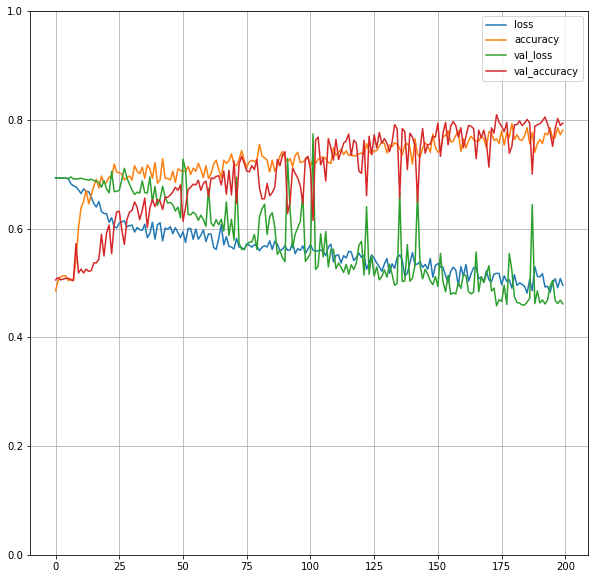

In [48]:
pd.DataFrame(history.history).plot( figsize=(10,10) )

plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

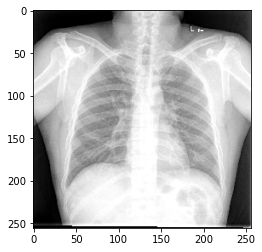

Tuberculosis -ve with accuracy of -25.9752%


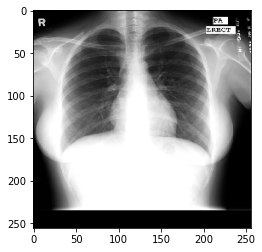

Tuberculosis -ve with accuracy of -18.1989%


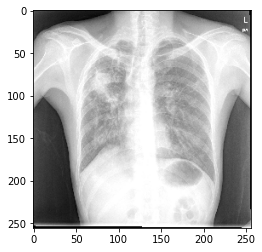

Tuberculosis -ve with accuracy of -45.0568%


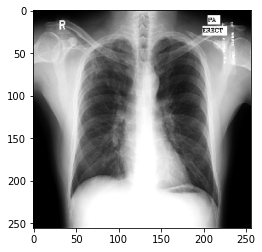

Tuberculosis -ve with accuracy of -25.0675%


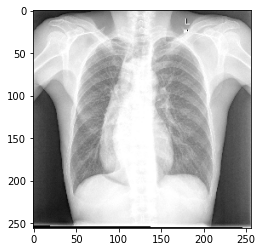

Tuberculosis -ve with accuracy of -49.8667%


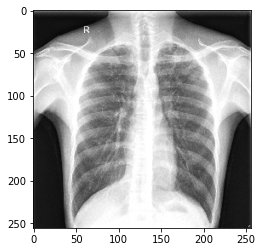

Tuberculosis +ve with accuracy of 94.1868%


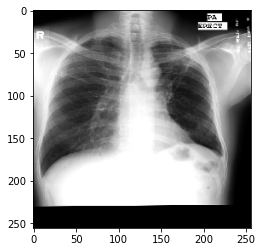

Tuberculosis -ve with accuracy of -27.1090%


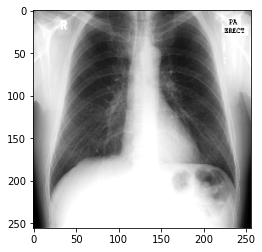

Tuberculosis -ve with accuracy of -36.1554%


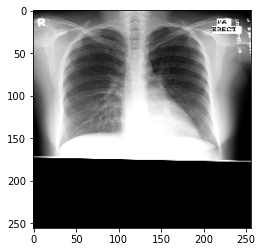

Tuberculosis -ve with accuracy of -18.0792%


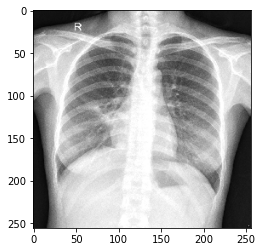

Tuberculosis +ve with accuracy of 88.8725%


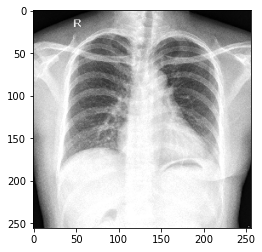

Tuberculosis +ve with accuracy of 87.4265%


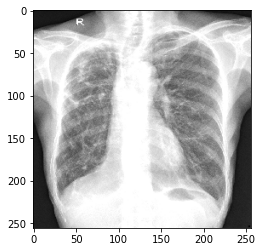

Tuberculosis +ve with accuracy of 93.7655%


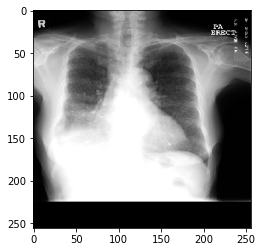

Tuberculosis -ve with accuracy of -18.7730%


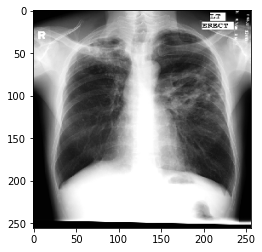

Tuberculosis -ve with accuracy of -38.3601%


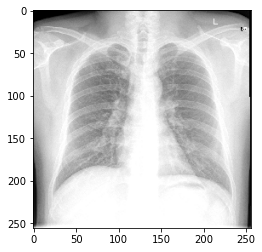

Tuberculosis -ve with accuracy of -32.8261%


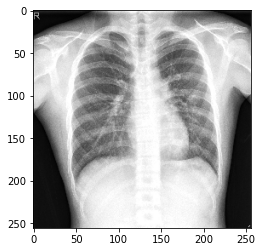

Tuberculosis +ve with accuracy of 93.9933%


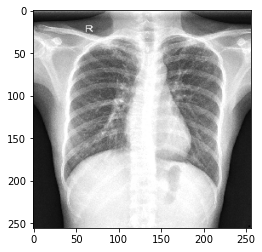

Tuberculosis +ve with accuracy of 94.6712%


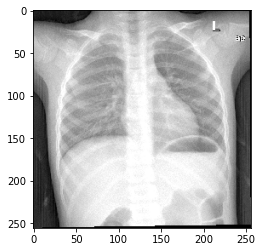

Tuberculosis -ve with accuracy of -35.3229%


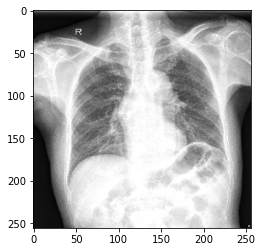

Tuberculosis +ve with accuracy of 93.8869%


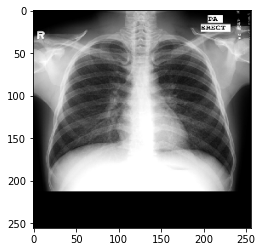

Tuberculosis +ve with accuracy of 55.7559%


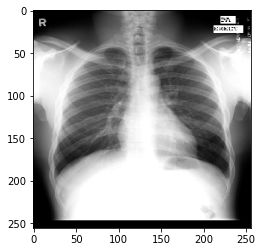

Tuberculosis -ve with accuracy of -16.7176%


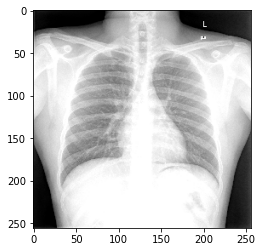

Tuberculosis -ve with accuracy of -17.3894%


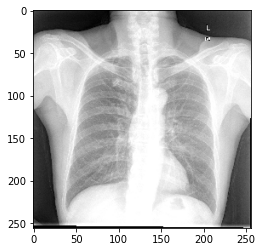

Tuberculosis -ve with accuracy of -31.8852%


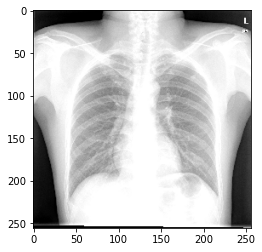

Tuberculosis -ve with accuracy of -28.9064%


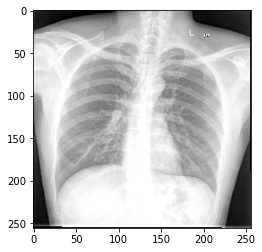

Tuberculosis -ve with accuracy of -42.1100%


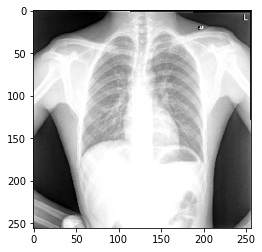

Tuberculosis -ve with accuracy of -26.5539%


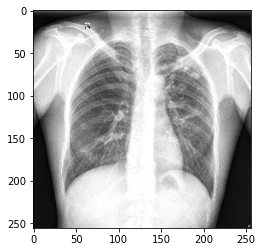

Tuberculosis +ve with accuracy of 93.9382%


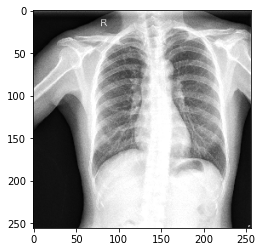

Tuberculosis +ve with accuracy of 90.5850%


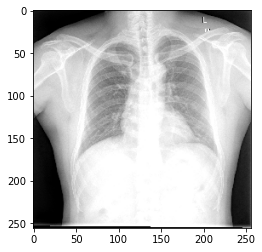

Tuberculosis -ve with accuracy of -18.9407%


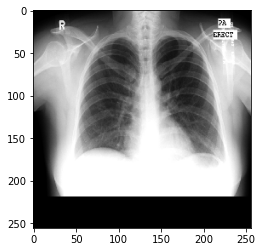

Tuberculosis -ve with accuracy of -27.9748%


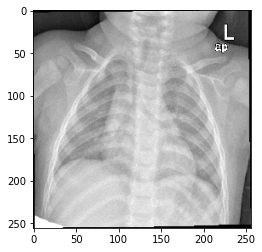

Tuberculosis -ve with accuracy of -27.0253%


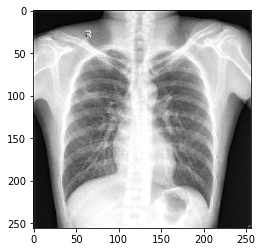

Tuberculosis +ve with accuracy of 94.2866%


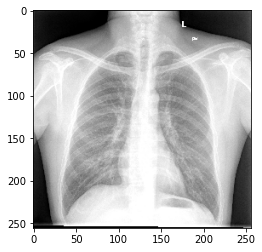

Tuberculosis -ve with accuracy of -15.1299%


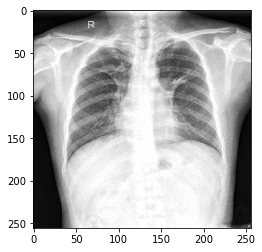

Tuberculosis +ve with accuracy of 89.7760%


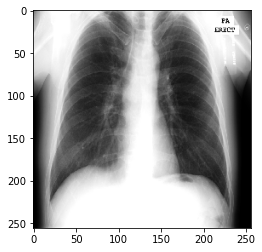

Tuberculosis +ve with accuracy of 82.0639%


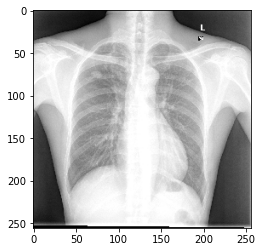

Tuberculosis -ve with accuracy of -27.0132%


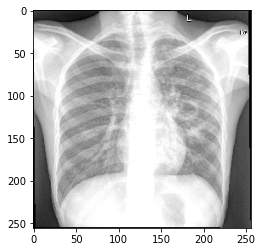

Tuberculosis +ve with accuracy of 62.9949%


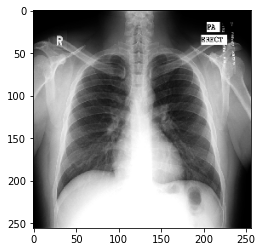

Tuberculosis -ve with accuracy of -28.0337%


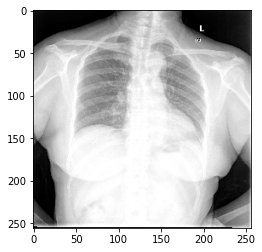

Tuberculosis -ve with accuracy of -9.0814%


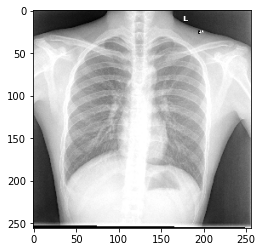

Tuberculosis -ve with accuracy of -21.2562%


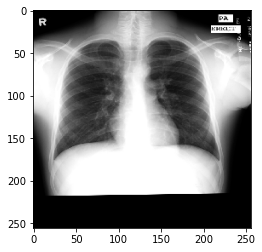

Tuberculosis -ve with accuracy of -18.7309%


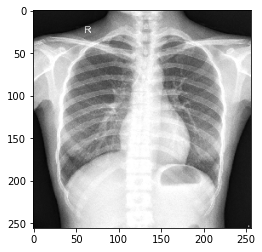

Tuberculosis +ve with accuracy of 92.9685%


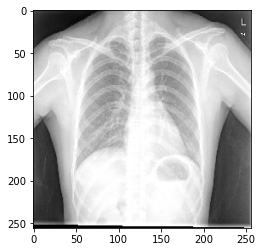

Tuberculosis -ve with accuracy of -29.6330%


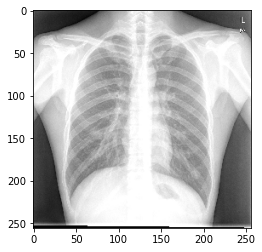

Tuberculosis -ve with accuracy of -38.5202%


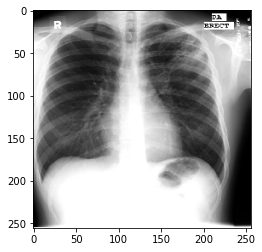

Tuberculosis +ve with accuracy of 55.6010%


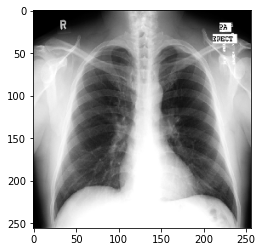

Tuberculosis -ve with accuracy of -24.7418%


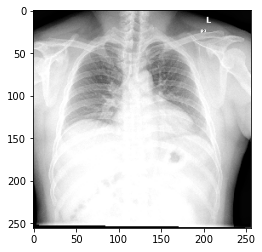

Tuberculosis -ve with accuracy of -21.2025%


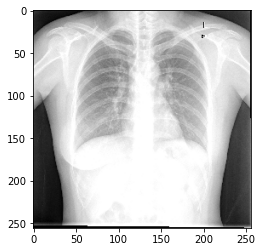

Tuberculosis -ve with accuracy of -29.7002%


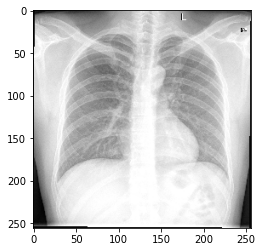

Tuberculosis -ve with accuracy of -32.5092%


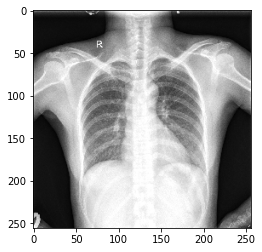

Tuberculosis +ve with accuracy of 89.2628%


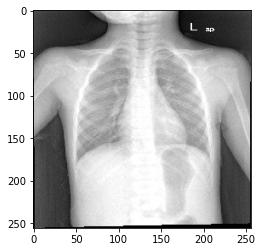

Tuberculosis -ve with accuracy of -15.0219%


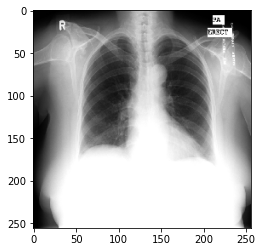

Tuberculosis -ve with accuracy of -28.4118%


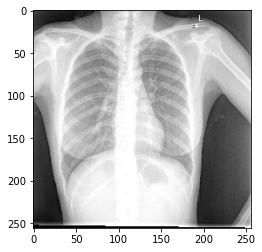

Tuberculosis -ve with accuracy of -34.4370%


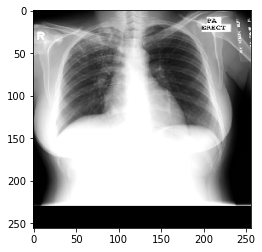

Tuberculosis -ve with accuracy of -10.8394%


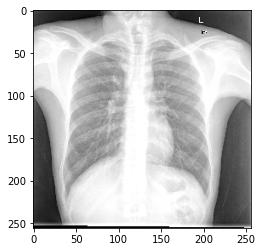

Tuberculosis -ve with accuracy of -33.5845%


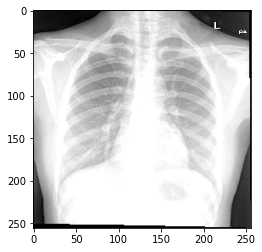

Tuberculosis -ve with accuracy of -20.0944%


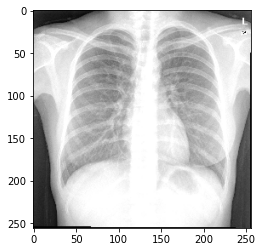

Tuberculosis -ve with accuracy of -32.1148%


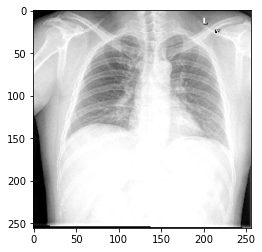

Tuberculosis -ve with accuracy of -28.1897%


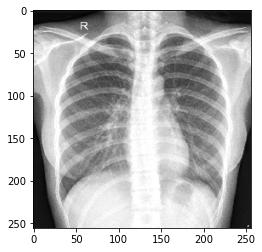

Tuberculosis +ve with accuracy of 94.4755%


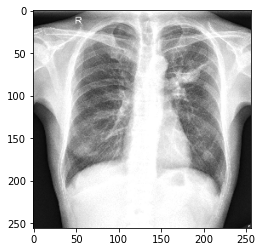

Tuberculosis +ve with accuracy of 94.2276%


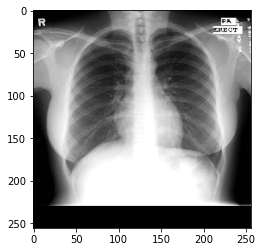

Tuberculosis -ve with accuracy of -12.9258%


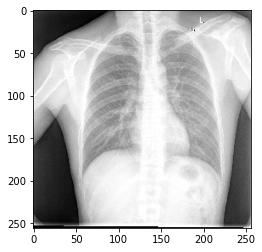

Tuberculosis -ve with accuracy of -27.7858%


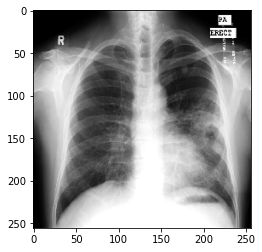

Tuberculosis -ve with accuracy of -34.0782%


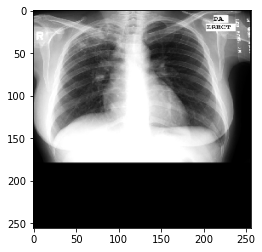

Tuberculosis +ve with accuracy of 57.7139%


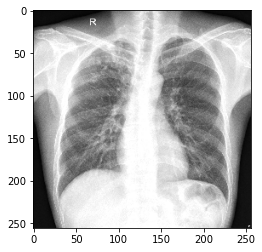

Tuberculosis +ve with accuracy of 93.5840%


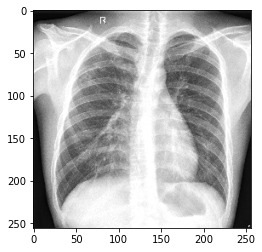

Tuberculosis +ve with accuracy of 94.3311%


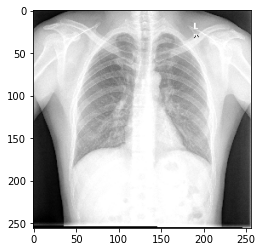

Tuberculosis -ve with accuracy of -29.1626%


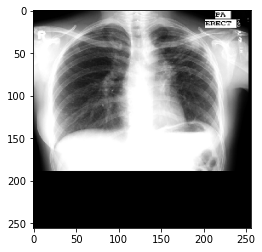

Tuberculosis +ve with accuracy of 54.6612%


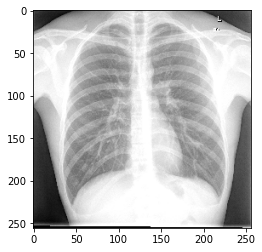

Tuberculosis +ve with accuracy of 54.4137%


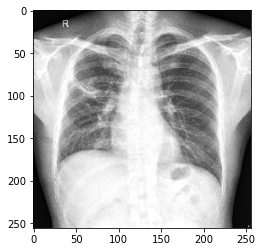

Tuberculosis +ve with accuracy of 94.3137%


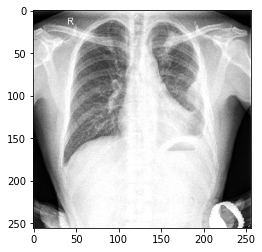

Tuberculosis -ve with accuracy of -32.6753%


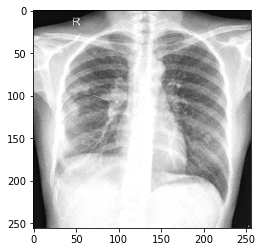

Tuberculosis +ve with accuracy of 93.5031%


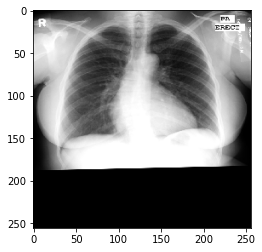

Tuberculosis -ve with accuracy of -22.7719%


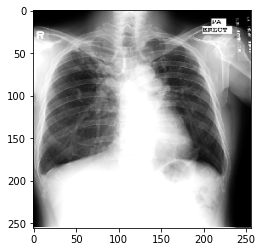

Tuberculosis +ve with accuracy of 77.1212%


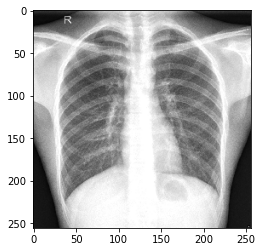

Tuberculosis +ve with accuracy of 93.7297%


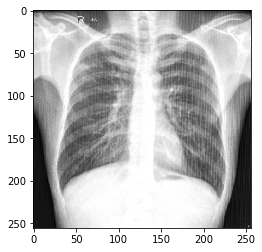

Tuberculosis +ve with accuracy of 94.2719%


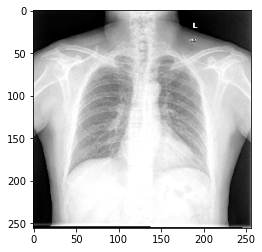

Tuberculosis -ve with accuracy of -12.6053%


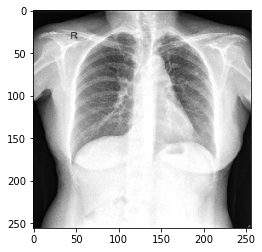

Tuberculosis -ve with accuracy of -42.7385%


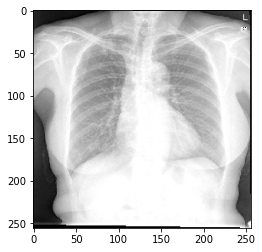

Tuberculosis -ve with accuracy of -30.1310%


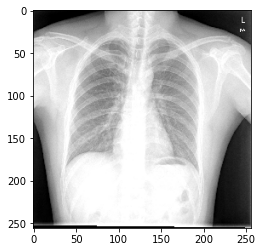

Tuberculosis -ve with accuracy of -26.2481%


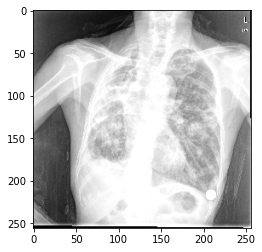

Tuberculosis -ve with accuracy of -49.3904%


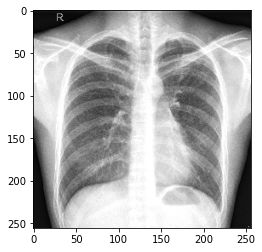

Tuberculosis +ve with accuracy of 94.4753%


In [50]:
sol=[]
def predict_unseen(model): 
    for img_raw_str in test['filename']:
        img_raw = img_raw_str.split('test/')[1]
        pred_image = image.load_img(test_dir+'/'+img_raw, target_size=(256,256) )
        pred_image = image.img_to_array(pred_image) / 225
        plt.imshow(pred_image)
        pred_image = np.array([pred_image])
        prediction = model.predict(pred_image)
        sol.append(prediction[0][0])
    #     if prediction[0][0] == 
        plt.show()
        if prediction[0][0] >=  0.51:
            print('Tuberculosis +ve with accuracy of {0:.4f}%'.format(prediction[0][0] * 100 ))
        elif prediction[0][0] ==  0.50:
            print('Tuberculosis -ve {0}.3f sure Tuberculosis +ve {0:.4f}%'.format(prediction[0][0] * 100))
        else:
            print('Tuberculosis -ve with accuracy of {0:.4f}%'.format( ( 1- prediction[0][0] ) * 100 ) )


predict_unseen(start_learning)

In [51]:
submission_copy = submission.copy()
submission_copy['LABEL'] = sol
submission_copy.to_csv('cnn3.csv', index=False)